<a href="https://colab.research.google.com/github/roshni33/100-days-of-AI/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

In [33]:
dataframe = pd.read_csv("/content/merged-csv.csv")

In [34]:
dataframe.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496.0,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767.0,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126.0,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [35]:
# Save the 'trans_date_trans_time' column for later use if needed
trans_date_trans_time_column = dataframe['trans_date_trans_time']


In [36]:
# Drop non-numeric columns
dataframe = dataframe.select_dtypes(exclude=['object'])


In [37]:
# Standardize the 'amt' column
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["amt"].values.reshape(-1, 1))


In [38]:
# Drop unnecessary columns
dataframe.drop(["amt", "trans_date_trans_time"], inplace=True, axis=1, errors='ignore')


In [39]:
# Define features(columns) and target variable(Y)
Y = dataframe["is_fraud"]
X = dataframe.drop(["is_fraud"], axis=1)


In [40]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


In [41]:
# Combine X_imputed and Y before splitting to handle missing values
data_imputed = pd.DataFrame(X_imputed, columns=X.columns)
data_imputed["is_fraud"] = Y


In [42]:
# Remove rows with NaN values in the target variable(is_fraud)
data_imputed = data_imputed.dropna(subset=["is_fraud"])


In [43]:

# Split the data into training and testing sets
(train_X, test_X, train_Y, test_Y) = train_test_split(
    data_imputed.drop(["is_fraud"], axis=1),
    data_imputed["is_fraud"],
    test_size=0.3,	 #testing 30% , training 70%
    random_state=42  #split is same everytime we run the code
)


In [44]:
#handling imbalanced dataset using random forest  - #resampling - oversampling done
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE  # For oversampling
from imblearn.under_sampling import RandomUnderSampler  # For undersampling
from sklearn.metrics import precision_score, recall_score, f1_score

random_forest = RandomForestClassifier(n_estimators=10)		#10 decision trees

# Assuming train_X and train_Y are already defined
smote = SMOTE(random_state=42)  # Create a SMOTE object

# Fit SMOTE to the training data
train_X_balanced, train_Y_balanced = smote.fit_resample(train_X, train_Y)

# Now, train your model on the balanced dataset
random_forest.fit(train_X_balanced, train_Y_balanced)

# Make predictions
pred_rf = random_forest.predict(test_X)

# Evaluate the model
rf_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Accuracy: ", rf_score)
print("Precision for rf: {:.5f}".format(precision_score(test_Y,pred_rf)))
print("Recall for rf: {:.5f}".format(recall_score(test_Y,pred_rf)))
print("F1-score for rf: {:.5f}".format(f1_score(test_Y,pred_rf)))


Random Forest Accuracy:  99.54221294883374
Precision for rf: 0.45841
Recall for rf: 0.78849
F1-score for rf: 0.57976


In [45]:
#handling imbalanced dataset using knn - #resampling - oversampling done
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE  # For oversampling
from imblearn.under_sampling import RandomUnderSampler  # For undersampling
from sklearn.metrics import precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=5)

# Assuming train_X and train_Y are already defined
smote = SMOTE(random_state=42)  # Create a SMOTE object

# Fit SMOTE to the training data
train_X_balanced, train_Y_balanced = smote.fit_resample(train_X, train_Y)

# Now, train your model on the balanced dataset
knn.fit(train_X_balanced, train_Y_balanced)

# Make predictions
knn_pred = knn.predict(test_X)

# Evaluate the model
knn_score = knn.score(test_X, test_Y) * 100
print("knn Accuracy: ",knn_score)
print("Precision for knn: {:.5f}".format(precision_score(test_Y,knn_pred)))
print("Recall for knn: {:.5f}".format(recall_score(test_Y,knn_pred)))
print("F1-score for knn: {:.5f}".format(f1_score(test_Y,knn_pred)))


knn Accuracy:  98.90504811435333
Precision for knn: 0.26104
Recall for knn: 0.94712
F1-score for knn: 0.40927


Confusion Matrix - Random Forest
[[159313    599]
 [   136    507]]


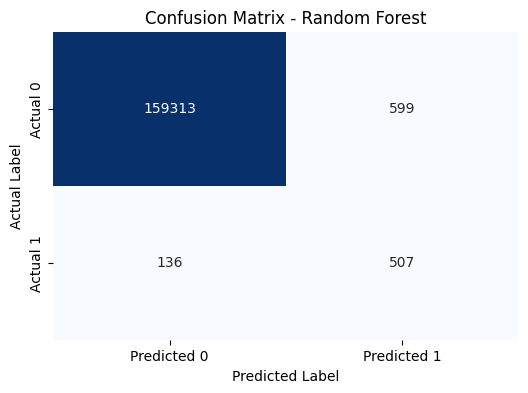

In [46]:
#confusion matrix - random forest
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix_rf = confusion_matrix(test_Y, pred_rf.round())

# Display the confusion matrix using seaborn
confusion_matrix_rf = confusion_matrix(test_Y, pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()



Confusion Matrix - knn
[[158188   1724]
 [    34    609]]


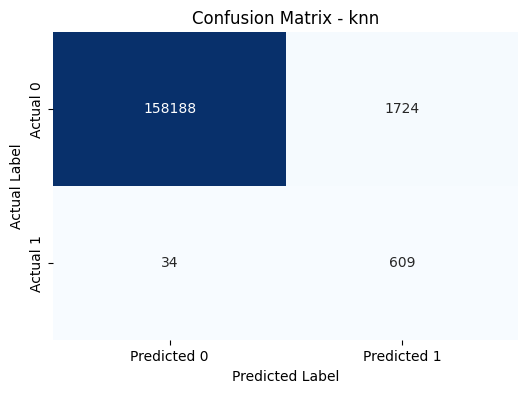

In [47]:
#confusion matrix - knn
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix_rf = confusion_matrix(test_Y, knn_pred.round())

# Display the confusion matrix using seaborn
confusion_matrix_rf = confusion_matrix(test_Y, knn_pred.round())
print("Confusion Matrix - knn")
print(confusion_matrix_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - knn')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


Random Forest ROC-AUC: 0.96164


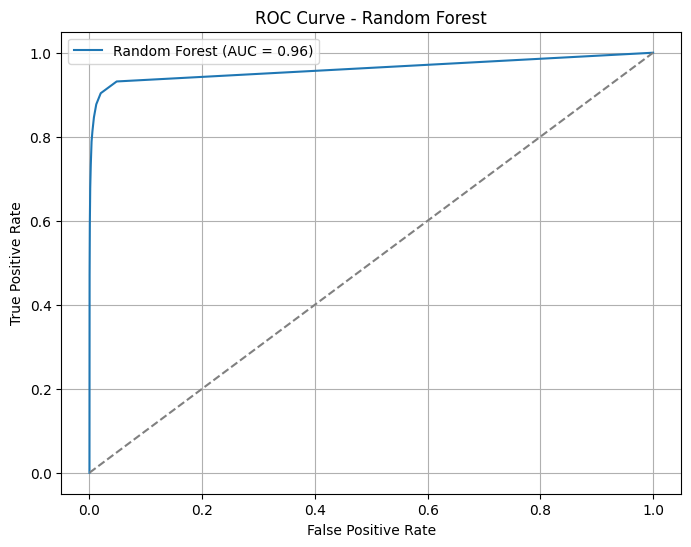

In [48]:
#ROC-AUC - rf
from sklearn.metrics import roc_auc_score, roc_curve
pred_rf_proba = random_forest.predict_proba(test_X)[:, 1]  # Get probabilities for the positive class
rf_roc_auc = roc_auc_score(test_Y, pred_rf_proba)

print("Random Forest ROC-AUC: {:.5f}".format(rf_roc_auc))

# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(test_Y, pred_rf_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(rf_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

KNN ROC-AUC: 0.98072


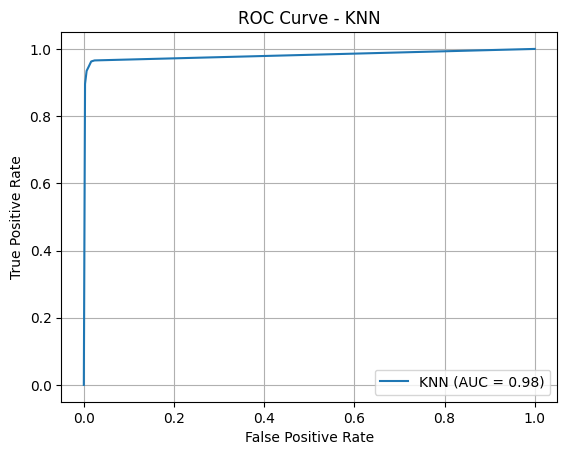

In [49]:
#ROC-AUC - knn
from sklearn.metrics import roc_auc_score, roc_curve
knn_proba = knn.predict_proba(test_X)[:, 1]  # Get probabilities for the positive class
knn_roc_auc = roc_auc_score(test_Y, knn_proba)

print("KNN ROC-AUC: {:.5f}".format(knn_roc_auc)) # has a very high ability to correctly classify transactions.

# Plot ROC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(test_Y, knn_proba)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(knn_roc_auc))
plt.title('ROC Curve - KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [50]:
#testing with own values - example1

ip3 = pd.DataFrame({
    "trans_date_trans_time": ["20-05-2019 11:45"],
    "amt": [2.305560e+15],
    "first": ["jiwon"],
    "last": ["lee"],
    "gender": ["M"],
    "street": ["128 Darlene Green"],
    "city": ["NY"],
    "zip": [11710],
    "lat": [40.6729],
    "long": [-73.5365],
    "city_pop": [34496],
    "job": ["Software Developer"],
    "dob": ["09-03-1993"],
    "trans_num": ["6da90x7d74bd46a0caf3777415b3ebd3"],
    "unix_time": [1371816867],
    "merch_lat": [40.49581],
    "merch_long": [-74.196111]
})

# Ensure columns in ip3 match the training data columns
ip3 = ip3.reindex(columns=X.columns, fill_value=0)

# Handle missing values
ip3_imputed = imputer.transform(ip3)

# Standardize the 'amt' column
ip3["NormalizedAmount"] = scaler.transform(ip3_imputed[:, 0].reshape(-1, 1))  # Assuming 'amt' is the first column after imputation

# Drop unnecessary columns
ip3.drop(["amt", "trans_date_trans_time"], inplace=True, axis=1, errors='ignore')

# Make predictions using the RandomForestClassifier
pred = random_forest.predict(ip3)
print(pred)

if pred == 1:
    print("Fraud Transaction")
else:
    print("Legitimate Transaction")



[0.]
Legitimate Transaction


In [51]:
##testing with own values - example2

ip3 = pd.DataFrame({
    "Column1":0,
    "trans_date_trans_time": ["11-01-2019 23:19"],
    "cc_num":[4.58758E+15],
    "merchant":["Erdman-Durgan"],
    "category":["health_fitness"],
    "amt": [24.78],
    "first": ["Tina"],
    "last": ["Lawrence"],
    "gender": ["F"],
    "street": ["1244 Iacob Pines"],
    "city": ["Nobleboro"],
    "state":["ME"],
    "zip": [4555],
    "lat": [44.0943],
    "long": [-90.4828],
    "city_pop": [1643],
    "job": ["sweeper"],
    "dob": ["12-04-1976"],
    "trans_num": ["37cf814645218a60bb7cv138371947a6a"],
    "unix_time": [1326323953],
    "merch_lat": [45.047977],
    "merch_long": [-145.949649]
})

# Ensure columns in ip3 match the training data columns
ip3 = ip3.reindex(columns=X.columns, fill_value=0)

# Handle missing values
ip3_imputed = imputer.transform(ip3)

# Standardize the 'amt' column
ip3["NormalizedAmount"] = scaler.transform(ip3_imputed[:, 0].reshape(-1, 1))  # Assuming 'amt' is the first column after imputation

# Drop unnecessary columns
ip3.drop(["amt", "trans_date_trans_time"], inplace=True, axis=1, errors='ignore')

# Make predictions using the RandomForestClassifier
pred = knn.predict(ip3)
print(pred)

if pred == 1:
    print("Fraud Transaction")
else:
    print("Legitimate Transaction")


[1.]
Fraud Transaction
